# From Pipeline to Revenue
* Predicting a company’s proposal wins and losses from its sales pipeline


Capstone Project for Springboard - by **Andres Forero**

# Project


The goal of every business is to sell products or services to potential and existing customers. Over time, a selling organization can develop a database or list of potential and existing clients to whom they want to sell their products.    
In a services organization, that means bidding on opportunities, contracts or work.  More formally, the term “sales pipeline” has come to mean a formal visual representation of those potential customers and the “stage” where they are in the selling process.
* My capstone project will investigate a service company’s sales pipeline, and using a multi-class classification method will predict when a sales opportunity will be either 1) a Win, 2) a Loss, or 3) Other (company decided not to bid on the work, or the client decided to cancel their contract opportunity before a win / lose decision was made)




# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas import Series, DataFrame
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [4]:
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from copy import deepcopy

# Data Loading & Processing:

In [12]:
# Read in data

pipeline = pd.read_excel('PipelineMultiClass3.xlsx')

In [13]:
pipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14659 entries, 0 to 14658
Data columns (total 53 columns):
Win_Lose_Log                       14659 non-null int64
Multiclass                         14659 non-null int64
4_Class                            14659 non-null int64
BidWin%                            14659 non-null float64
Fiscal_Year                        14659 non-null int64
Proposal #                         14659 non-null float64
Business Unit                      14659 non-null int64
Bid_NoBid                          14659 non-null int64
BidProbability%                    14659 non-null float64
BlankBidProb                       14659 non-null int64
UndeterminedBidProb                14659 non-null int64
LowBidProb                         14659 non-null int64
MediumBidProb                      14659 non-null int64
HighBidProb                        14659 non-null int64
AdjEstimatedBase+OptionDuration    14659 non-null int64
Amount                             14659 non-

In [14]:
# drop the Multiclass column, so that all other features can be used as the x values.  
# The Multiclass column will be the Target column for the Multiclass categorization algorithms.

X = pipeline.drop('Multiclass', axis = 1)

In [15]:
X = X.drop('4_Class', axis = 1)

In [16]:
# Also drop the Win_Lose_Log column, which will be used as the Target column only in the logistic Regression.

X = X.drop('Win_Lose_Log', axis = 1)

In [17]:
# Since I am tackling logistic regression first, the Win_Lose_Log column will be the target column.

ylog = pipeline['Win_Lose_Log']

# Model # 1: Logistic Regression - One vs. All

Given logistic regression is mostly used for binary outcomes, I have to combined the "Losses" and "Other" classes into one class, and "Wins" will be its own class:

* Wins = 1
* Losses = 0
* Bid No / Cancel / Closed Other = 0

In [18]:
logmodel = LogisticRegression()

In [19]:
# Train test split using 33% split

X_trainLog, X_testLog, y_trainLog, y_testLog = train_test_split(X, ylog, test_size=0.33, random_state=101)

In [20]:
logmodel.fit(X_trainLog, y_trainLog)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predictionsLog = logmodel.predict(X_testLog)

In [22]:
print(confusion_matrix(y_testLog,predictionsLog))
print('\n')
print(classification_report(y_testLog,predictionsLog))

[[2531  724]
 [ 211 1372]]


             precision    recall  f1-score   support

          0       0.92      0.78      0.84      3255
          1       0.65      0.87      0.75      1583

avg / total       0.84      0.81      0.81      4838



# Use GridSearch CV to Optimize the Logistic model

In [23]:
log_params = {'C': [.01, .1, 1., 10., 100.]}

In [24]:
gridLog = GridSearchCV(LogisticRegression(),log_params,verbose=1)

In [25]:
gridLog.fit(X_trainLog,y_trainLog)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [26]:
gridLog.best_params_

{'C': 1.0}

In [27]:
gridLog.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
grid_predictionLog = gridLog.predict(X_testLog)

# Logistic Regression:  Below are the Recall and Precision scores:

In [29]:
print(confusion_matrix(y_testLog,grid_predictionLog))
print('\n')
print(classification_report(y_testLog,grid_predictionLog))

[[2531  724]
 [ 211 1372]]


             precision    recall  f1-score   support

          0       0.92      0.78      0.84      3255
          1       0.65      0.87      0.75      1583

avg / total       0.84      0.81      0.81      4838



In [30]:
logcoef = pd.DataFrame(zip(X_testLog.columns, gridLog.best_estimator_.coef_[0]), columns = ['features', 'Coefficients'])

# Below are the top 10 positive coefficients.  
* Feature "ActualB&PAmt" (The actual cost spent on the proposal) was the most positive coefficient. This means the higher the ActualB&PAmt, the more likely the proposal will be labeled as a 'Win'.


In [31]:
logcoef.sort_values('Coefficients',ascending=False).head(10)

,features,Coefficients
30,ActualB&PAmt,0.000022
43,Days_in_Negotiation,0.000021
2,Proposal #,0.000012
41,Days_in_PlanningCapture,0.000012
0,BidWin%,0.000006
28,ProbabilityWin100%,0.000005
20,ProbabilityWin,0.000005
15,Less1m,0.000002
27,ProbabilityWin90%,0.000002
4,Bid_NoBid,0.000001


# These are the most negative coefficients.  Using "Days_in_Review" as an example:  the higher the number of days that a proposal is in Review, the less likely that the proposal will be labelled as a "Win'.

In [32]:
logcoef.sort_values('Coefficients',ascending=False).tail(10)

,features,Coefficients
21,ProbabilityWin10%,-0.000003
37,Non-Fee Bearing,-0.000003
3,Business Unit,-0.000003
24,ProbabilityWin30%,-0.000003
29,EstimatedB&PAmt,-0.000031
40,Days_in_Qualification,-0.000074
11,AdjEstimatedBase+OptionDuration,-0.000153
42,Days_in_ProposalPriceQuote,-0.000232
44,Days_in_Review,-0.000445
1,Fiscal_Year,-0.001688


# Since I am finished analyzing Logistic Regression, and the rest of the models can do Multi-class categorization, now I will make the target be the "Multiclass" column.

In [27]:
# the Win_Lose column is the target column or y value

y = pipeline['Multiclass']

# Model # 2:  Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier()

In [30]:
# Train test split using 33% split

X_trainRfc, X_testRfc, y_trainRfc, y_testRfc = train_test_split(X, y, test_size=0.33, random_state=101)

In [31]:
rfc.fit(X_trainRfc,y_trainRfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
rfc_pred = rfc.predict(X_testRfc)

In [33]:
print(confusion_matrix(y_testRfc,rfc_pred))
print('\n')
print(classification_report(y_testRfc,rfc_pred))

[[ 745  166   53]
 [ 271 1270   42]
 [ 127  157 2007]]


             precision    recall  f1-score   support

          0       0.65      0.77      0.71       964
          1       0.80      0.80      0.80      1583
          2       0.95      0.88      0.91      2291

avg / total       0.84      0.83      0.84      4838



**Random Forest: GridSearch CV:**

In [35]:
forest_params = {'oob_score': [True, False], 
                 'min_samples_split': [2,3,4,8], 
                 'min_samples_leaf': [1,2,3,4,5,6],
                'n_estimators': [50,100, 150,200]}

In [36]:
gridrfc = GridSearchCV(RandomForestClassifier(),forest_params,verbose=1)

In [37]:
gridrfc.fit(X_trainRfc,y_trainRfc)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  4.0min
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  8.7min
[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed: 11.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 8], 'n_estimators': [50, 100, 150, 200], 'oob_score': [True, False], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [38]:
gridrfc.best_params_

{'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200,
 'oob_score': False}

In [39]:
gridrfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
grid_predictionRfc = gridrfc.predict(X_testRfc)

# Random Forests Optimized Precision and Recall Scores

In [41]:
print(confusion_matrix(y_testRfc,grid_predictionRfc))
print('\n')
print(classification_report(y_testRfc,grid_predictionRfc))

[[ 765  160   39]
 [ 267 1292   24]
 [ 114  142 2035]]


             precision    recall  f1-score   support

          0       0.67      0.79      0.73       964
          1       0.81      0.82      0.81      1583
          2       0.97      0.89      0.93      2291

avg / total       0.86      0.85      0.85      4838



# Random Forests:  most important features (sorted from Most to Least)

In [42]:
feat_imp_RFC2 = pd.DataFrame(zip(X_trainRfc.columns, np.transpose(gridrfc.best_estimator_.feature_importances_ ))).sort_values(1,ascending=False).head(10)
feat_imp_RFC2

,0,1
2,Proposal #,0.121112
4,Bid_NoBid,0.097861
0,BidWin%,0.086803
30,ActualB&PAmt,0.086438
13,WeightedAmount,0.077269
5,BidProbability%,0.070927
20,ProbabilityWin,0.059586
29,EstimatedB&PAmt,0.052631
12,Amount,0.041802
44,Days_in_Review,0.036390


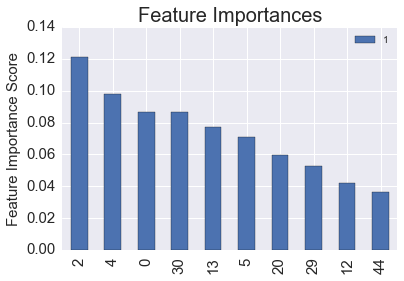

In [43]:
plt.figure(figsize=(20,8))
feat_imp_RFC2.plot(kind='bar', title='Feature Importances', fontsize=15)
plt.title('Feature Importances', fontsize = 20)
plt.ylabel('Feature Importance Score', fontsize=15)

# Model # 3:   XGBOOST

In [44]:
import xgboost

In [45]:
xgmodel = xgboost.XGBClassifier()

In [46]:
# Train test split using 33% split

X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(X, y, test_size=0.33, random_state=101)

In [47]:
xgmodel.fit(X_trainXG,y_trainXG)

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='multi:softprob', seed=0, silent=True,
       subsample=1)

In [48]:
XGpredictions = xgmodel.predict(X_testXG)

In [49]:
print(confusion_matrix(y_testXG,XGpredictions))
print('\n')
print(classification_report(y_testXG,XGpredictions))

[[ 783  155   26]
 [ 264 1297   22]
 [ 120  154 2017]]


             precision    recall  f1-score   support

          0       0.67      0.81      0.73       964
          1       0.81      0.82      0.81      1583
          2       0.98      0.88      0.93      2291

avg / total       0.86      0.85      0.85      4838



# Here are the 10 most important features (sorted most to least important):

* F44 = Days_in_Review
* F27 = ActualB&PAmt
* F9 = Amount
* F39 = Days_in_ProposalPriceQuote
* F0 = BidWin%
* F26 = EstimatedB&PAmt
* F1 = Bid_NoBid
* F10 = WeightedAmount
* F40 = Days_in_Negotiation
* F16 = EstimatedFee%

In [58]:
featu_impXG = pd.Series(xgmodel.booster().get_fscore()).sort_values(ascending=False)
featu_impXG.head(10)

f44    260
f30    219
f2     214
f12    166
f29    140
f0     139
f42    119
f13    100
f43     88
f4      84
dtype: int64

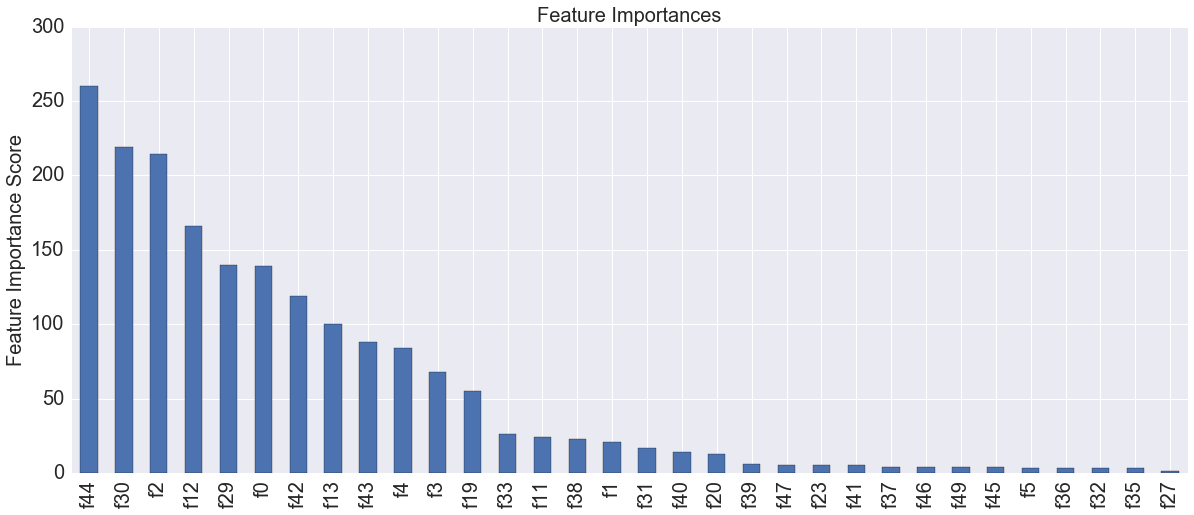

In [51]:
plt.figure(figsize=(20,8))
featu_impXG.plot(kind='bar', fontsize=20)
plt.title('Feature Importances', fontsize = 20)
plt.ylabel('Feature Importance Score', fontsize=20)

# Perform Kfold cross-validation with 5 folds:

In [52]:
kf_xg = KFold(len(pipeline), 5, shuffle=True, random_state=8)

In [53]:
xgmodel2 = xgboost.XGBClassifier()

* After performing Kfold cross-validation, here are the Precision scores for the 5 folds
* As you can see the scores are very similar to the scores calculated above in the Classification Reports
* This implies that the model generalizes well

In [54]:
precision = cross_val_score(xgmodel2,X, y, scoring="f1_weighted", cv=kf_xg)

average_precision = sum(precision) / len(precision)

print(precision)
print(average_precision)

[ 0.85071338  0.84927425  0.83793332  0.84594337  0.86156885]
0.849086630902


# I will perform a Grid Search to optimize the XGBoost parameters:

In [55]:
param_gridXGB = {'n_estimators':[100, 150, 200],'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

In [56]:
gridXGB = GridSearchCV(xgboost.XGBClassifier(),param_gridXGB,verbose=1)

In [57]:
gridXGB.fit(X_trainXG,y_trainXG)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='binary:logistic', seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [66]:
gridXGB.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [60]:
gridXGB.best_estimator_

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='multi:softprob', seed=0, silent=True,
       subsample=1)

In [61]:
grid_predictionXGB = gridXGB.predict(X_testXG)

# XGBoost Precision and Recall scores after GridSeach # 1:

In [62]:
print(confusion_matrix(y_testXG,grid_predictionXGB))
print('\n')
print(classification_report(y_testXG,grid_predictionXGB))

[[ 779  152   33]
 [ 262 1287   34]
 [ 107  138 2046]]


             precision    recall  f1-score   support

          0       0.68      0.81      0.74       964
          1       0.82      0.81      0.81      1583
          2       0.97      0.89      0.93      2291

avg / total       0.86      0.85      0.85      4838



# XGBoost GridSeach # 2:

In [63]:
param_gridXGB2 = {'n_estimators':[50, 100, 150, 200], 'max_depth':[2,4,6,8]}

In [64]:
gridXGB2 = GridSearchCV(xgboost.XGBClassifier(),param_gridXGB2,verbose=1)

In [65]:
gridXGB2.fit(X_trainXG,y_trainXG)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='binary:logistic', seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'max_depth': [2, 4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [67]:
gridXGB2.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [68]:
gridXGB2.best_estimator_

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='multi:softprob', seed=0, silent=True,
       subsample=1)

# XGBoost Precision and Recall scores after GridSearch #3:

In [70]:
print(confusion_matrix(y_testXG,grid_predictionXGB))
print('\n')
print(classification_report(y_testXG,grid_predictionXGB))

[[ 779  152   33]
 [ 262 1287   34]
 [ 107  138 2046]]


             precision    recall  f1-score   support

          0       0.68      0.81      0.74       964
          1       0.82      0.81      0.81      1583
          2       0.97      0.89      0.93      2291

avg / total       0.86      0.85      0.85      4838



# XGBoost GridSearch # 3:

In [71]:
param_gridXGB3 = {'subsample':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]}

In [78]:
gridXGB3 = GridSearchCV(xgboost.XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=6, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='multi:softprob', seed=0, silent=True,
       subsample=1),param_gridXGB3,verbose=1)

In [79]:
gridXGB3.fit(X_trainXG,y_trainXG)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   52.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=6, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='multi:softprob', seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [80]:
gridXGB3.best_params_

{'subsample': 1.0}

In [81]:
gridXGB3.best_estimator_

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=6, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='multi:softprob', seed=0, silent=True,
       subsample=1.0)

In [82]:
grid_predictionXGB3 = gridXGB3.predict(X_testXG)

# XGBoost Precision and Recall scores after GridSearch #3:

In [170]:
print(confusion_matrix(y_testXG,grid_predictionXGB3))
print('\n')
print(classification_report(y_testXG,grid_predictionXGB3))

[[ 753  169   42]
 [ 234 1308   41]
 [  95  133 2063]]


             precision    recall  f1-score   support

          0       0.70      0.78      0.74       964
          1       0.81      0.83      0.82      1583
          2       0.96      0.90      0.93      2291

avg / total       0.86      0.85      0.86      4838



# Here are the 11 most important features for this round:

* F30 = ActualB&PAmt
* F2 = Proposal #
* F12 = Amount
* F29 = EstimatedB&PAmt
* F13 = WeightedAmount
* F44 = Days_in_Review
* F42 = Days_in_ProposalPriceQuote
* F19 = EstimatedFee%
* F11 = AdjEstimatedBase+OptionDuration
* F40 = Days_in_Qualification
* F0 = BidWin%


In [172]:
feat_impXGB1 = pd.Series(gridXGB3.best_estimator_.booster().get_fscore()).sort_values(ascending=False)
feat_impXGB1.head(11)

f30    1163
f2     1110
f12     973
f29     864
f13     812
f44     761
f42     551
f19     450
f11     388
f40     294
f0      247
dtype: int64

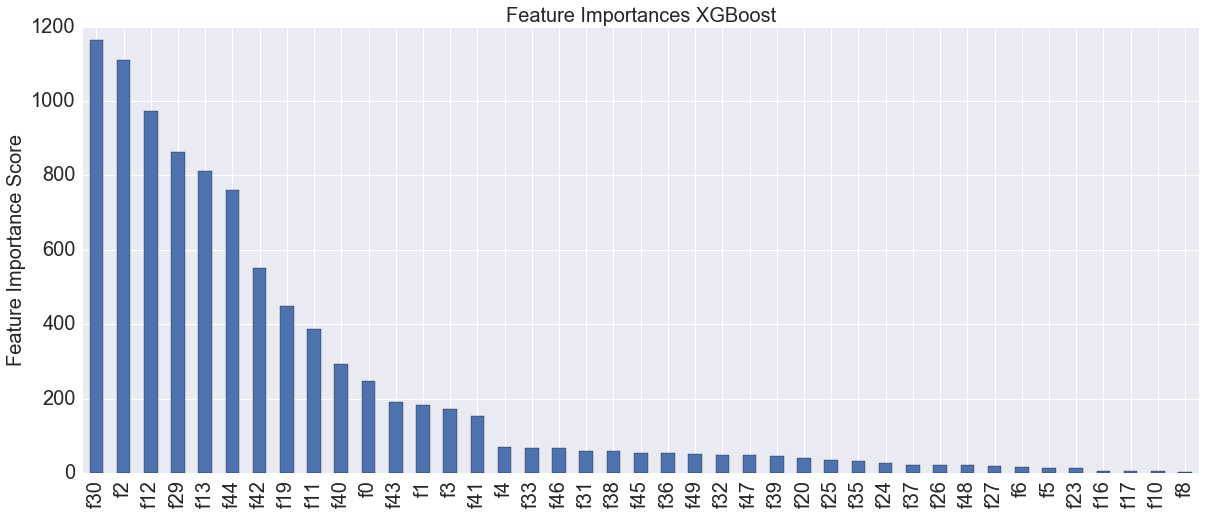

In [85]:
plt.figure(figsize=(20,8))
feat_impXGB1.plot(kind='bar', fontsize=20)
plt.title('Feature Importances XGBoost', fontsize = 20)
plt.ylabel('Feature Importance Score', fontsize=20)

# Model # 4:  Support Vector Machines

* Scale Data for SVM:

In [86]:
scalerSVM = StandardScaler()

In [87]:
scalerSVM.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [88]:
scaled_featureSVM = scalerSVM.transform(X)

In [89]:
df_featSVM = pd.DataFrame(scaled_featureSVM,columns=X.columns)

In [90]:
df_featSVM.head()

,BidWin%,Fiscal_Year,Proposal #,Business Unit,Bid_NoBid,BidProbability%,BlankBidProb,UndeterminedBidProb,LowBidProb,MediumBidProb,...,Days_in_Qualification,Days_in_PlanningCapture,Days_in_ProposalPriceQuote,Days_in_Negotiation,Days_in_Review,AdditionalMarketsMultiAreaBlank,EducationWorkforceDev,EnergyEnvironment,FoodAgriculture,Health
0,0.310252,-1.507868,0.590925,-0.662991,0.782041,0.773116,0.366277,-0.045285,-0.109601,-0.131988,...,-0.293958,-0.125456,-0.282784,-0.125584,-0.325019,-0.673350,-0.246392,-0.420326,-0.170266,1.100005
1,-0.209043,-1.507868,0.589685,-0.662991,0.782041,0.773116,0.366277,-0.045285,-0.109601,-0.131988,...,-0.293958,-0.125456,-0.282784,-0.125584,-0.325019,-0.673350,-0.246392,-0.420326,-0.170266,1.100005
2,0.310252,-1.507868,4.305030,-0.662991,0.782041,0.773116,0.366277,-0.045285,-0.109601,-0.131988,...,-0.293958,-0.125456,-0.282784,-0.125584,-0.325019,-0.673350,-0.246392,-0.420326,-0.170266,1.100005
3,0.310252,-1.507868,0.590306,-0.662991,0.782041,0.773116,0.366277,-0.045285,-0.109601,-0.131988,...,-0.293958,-0.125456,-0.282784,-0.125584,-0.325019,-0.673350,-0.246392,-0.420326,-0.170266,1.100005
4,-0.728338,-1.507868,0.590924,-0.662991,0.782041,0.773116,0.366277,-0.045285,-0.109601,-0.131988,...,-0.293958,-0.125456,-0.282784,-0.125584,-0.325019,1.485111,-0.246392,-0.420326,-0.170266,-0.909087


In [91]:
# Train test split using 33% split

X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(df_featSVM, y, test_size=0.33, random_state=101)

# Run SVM Algorithm

In [92]:
model = SVC(probability=True)

In [93]:
model.fit(X_trainSVM,y_trainSVM)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
predictionSVM = model.predict(X_testSVM)

In [95]:
print(confusion_matrix(y_testSVM,predictionSVM))
print('\n')
print(classification_report(y_testSVM,predictionSVM))

[[ 783  155   26]
 [ 276 1276   31]
 [ 175  176 1940]]


             precision    recall  f1-score   support

          0       0.63      0.81      0.71       964
          1       0.79      0.81      0.80      1583
          2       0.97      0.85      0.90      2291

avg / total       0.85      0.83      0.83      4838



# Use GridSearchCV to optimize the C and gamma parameters:

In [96]:
param_grid = {'C':[0.001,0.1,1,10,100],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [97]:
grid = GridSearchCV(SVC(probability=True),param_grid,verbose=1)

In [98]:
grid.fit(X_trainSVM,y_trainSVM)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed: 18.5min
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 25.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [99]:
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [100]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
grid_predictionSVM = grid.predict(X_testSVM)

# SVM -  Precision and Recall Scores:

In [102]:
print(confusion_matrix(y_testSVM,grid_predictionSVM))
print('\n')
print(classification_report(y_testSVM,grid_predictionSVM))

[[ 786  152   26]
 [ 291 1263   29]
 [ 164  171 1956]]


             precision    recall  f1-score   support

          0       0.63      0.82      0.71       964
          1       0.80      0.80      0.80      1583
          2       0.97      0.85      0.91      2291

avg / total       0.85      0.83      0.83      4838



# Model # 5:   K Nearest Neighbors

In [103]:
scaler = StandardScaler()

In [104]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [105]:
scaled_features = scaler.transform(X)

In [106]:
df_feat = pd.DataFrame(scaled_features,columns=X.columns)

In [107]:
df_feat.head()

,BidWin%,Fiscal_Year,Proposal #,Business Unit,Bid_NoBid,BidProbability%,BlankBidProb,UndeterminedBidProb,LowBidProb,MediumBidProb,...,Days_in_Qualification,Days_in_PlanningCapture,Days_in_ProposalPriceQuote,Days_in_Negotiation,Days_in_Review,AdditionalMarketsMultiAreaBlank,EducationWorkforceDev,EnergyEnvironment,FoodAgriculture,Health
0,0.310252,-1.507868,0.590925,-0.662991,0.782041,0.773116,0.366277,-0.045285,-0.109601,-0.131988,...,-0.293958,-0.125456,-0.282784,-0.125584,-0.325019,-0.673350,-0.246392,-0.420326,-0.170266,1.100005
1,-0.209043,-1.507868,0.589685,-0.662991,0.782041,0.773116,0.366277,-0.045285,-0.109601,-0.131988,...,-0.293958,-0.125456,-0.282784,-0.125584,-0.325019,-0.673350,-0.246392,-0.420326,-0.170266,1.100005
2,0.310252,-1.507868,4.305030,-0.662991,0.782041,0.773116,0.366277,-0.045285,-0.109601,-0.131988,...,-0.293958,-0.125456,-0.282784,-0.125584,-0.325019,-0.673350,-0.246392,-0.420326,-0.170266,1.100005
3,0.310252,-1.507868,0.590306,-0.662991,0.782041,0.773116,0.366277,-0.045285,-0.109601,-0.131988,...,-0.293958,-0.125456,-0.282784,-0.125584,-0.325019,-0.673350,-0.246392,-0.420326,-0.170266,1.100005
4,-0.728338,-1.507868,0.590924,-0.662991,0.782041,0.773116,0.366277,-0.045285,-0.109601,-0.131988,...,-0.293958,-0.125456,-0.282784,-0.125584,-0.325019,1.485111,-0.246392,-0.420326,-0.170266,-0.909087


In [108]:
# Train test split using 33% split

X_trainKnn, X_testKnn, y_trainKnn, y_testKnn = train_test_split(df_feat, y, test_size=0.33, random_state=101)

In [109]:
knn = KNeighborsClassifier(n_neighbors=1)

In [110]:
knn.fit(X_trainKnn,y_trainKnn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [111]:
predKnn = knn.predict(X_testKnn)

In [112]:
print(confusion_matrix(y_testKnn,predKnn))
print('\n')
print(classification_report(y_testKnn,predKnn))

[[ 558  263  143]
 [ 278 1143  162]
 [ 152  170 1969]]


             precision    recall  f1-score   support

          0       0.56      0.58      0.57       964
          1       0.73      0.72      0.72      1583
          2       0.87      0.86      0.86      2291

avg / total       0.76      0.76      0.76      4838



In [113]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainKnn,y_trainKnn)
    pred_i = knn.predict(X_testKnn)
    error_rate.append(np.mean(pred_i != y_testKnn))  

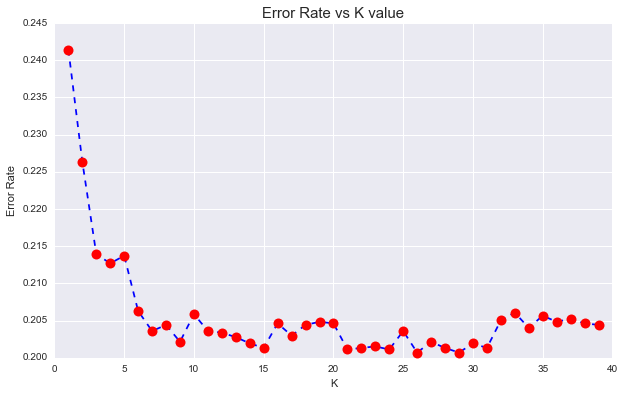

In [115]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value', fontsize=15)
plt.xlabel('K')
plt.ylabel('Error Rate')

# KNN - Precision and Recall Scores:

In [116]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_trainKnn,y_trainKnn)

predK = knn.predict(X_testKnn)

print(confusion_matrix(y_testKnn,predKnn))
print('\n')
print(classification_report(y_testKnn,predKnn))

[[ 558  263  143]
 [ 278 1143  162]
 [ 152  170 1969]]


             precision    recall  f1-score   support

          0       0.56      0.58      0.57       964
          1       0.73      0.72      0.72      1583
          2       0.87      0.86      0.86      2291

avg / total       0.76      0.76      0.76      4838



# Model # 6:  Decision Trees

In [117]:
dtree = DecisionTreeClassifier()

In [118]:
# Train test split using 33% split

X_trainTree, X_testTree, y_trainTree, y_testTree = train_test_split(X, y, test_size=0.33, random_state=101)

In [119]:
dtree.fit(X_trainTree,y_trainTree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [120]:
treepredictions = dtree.predict(X_testTree)

# Trees Precision and Recall scores:

In [121]:
print(confusion_matrix(y_testTree,treepredictions))
print('\n')
print(classification_report(y_testTree,treepredictions))

[[ 603  243  118]
 [ 262 1187  134]
 [  93  146 2052]]


             precision    recall  f1-score   support

          0       0.63      0.63      0.63       964
          1       0.75      0.75      0.75      1583
          2       0.89      0.90      0.89      2291

avg / total       0.79      0.79      0.79      4838



# Export Data

In [122]:
from copy import deepcopy

In [127]:
newdf1 = X_testXG

In [128]:
newdf1["Predicted_Labels"] = grid_predictionXGB3

C:\Users\aforero\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [129]:
newdf1["Original_Labels"] = y_testXG

C:\Users\aforero\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [130]:
newdf1.to_csv("XGBoost_predictions.csv")

In [165]:
traindf = X_trainXG

In [166]:
XGpredictions_train = xgmodel.predict(X_trainXG)

In [167]:
traindf["Predicted_Labels"] = XGpredictions_train

C:\Users\aforero\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [168]:
traindf["Original_Labels"] = y_trainXG

C:\Users\aforero\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [169]:
traindf.to_csv("XGBoost_predictions_train.csv")